In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CT and MRI brain scans - already mapped -> convert to a dataframe



Files in TrainA:
['ct1.png', 'ct1001.png', 'ct1002.png', 'ct1003.png', 'ct1004.png', 'ct1005.png', 'ct1006.png', 'ct1007.png', 'ct101.png', 'ct1011.png', 'ct1012.png', 'ct1013.png', 'ct1014.png', 'ct1015.png', 'ct1016.png', 'ct1017.png', 'ct102.png', 'ct1021.png', 'ct1022.png', 'ct1023.png', 'ct1024.png', 'ct1025.png', 'ct1026.png', 'ct1027.png', 'ct103.png', 'ct1031.png', 'ct1032.png', 'ct1033.png', 'ct1034.png', 'ct1035.png', 'ct1036.png', 'ct1037.png', 'ct104.png', 'ct1041.png', 'ct1042.png', 'ct1043.png', 'ct1044.png', 'ct1045.png', 'ct1046.png', 'ct1047.png', 'ct105.png', 'ct1051.png', 'ct1052.png', 'ct1053.png', 'ct1054.png', 'ct1055.png', 'ct1056.png', 'ct1057.png', 'ct106.png', 'ct1061.png', 'ct1062.png', 'ct1063.png', 'ct1064.png', 'ct1065.png', 'ct1066.png', 'ct1067.png', 'ct107.png', 'ct1071.png', 'ct1072.png', 'ct1073.png', 'ct1074.png', 'ct1075.png', 'ct1076.png', 'ct1077.png', 'ct1081.png', 'ct1082.png', 'ct1083.png', 'ct1084.png', 'ct1085.png', 'ct1086.png', 'ct1087.png'

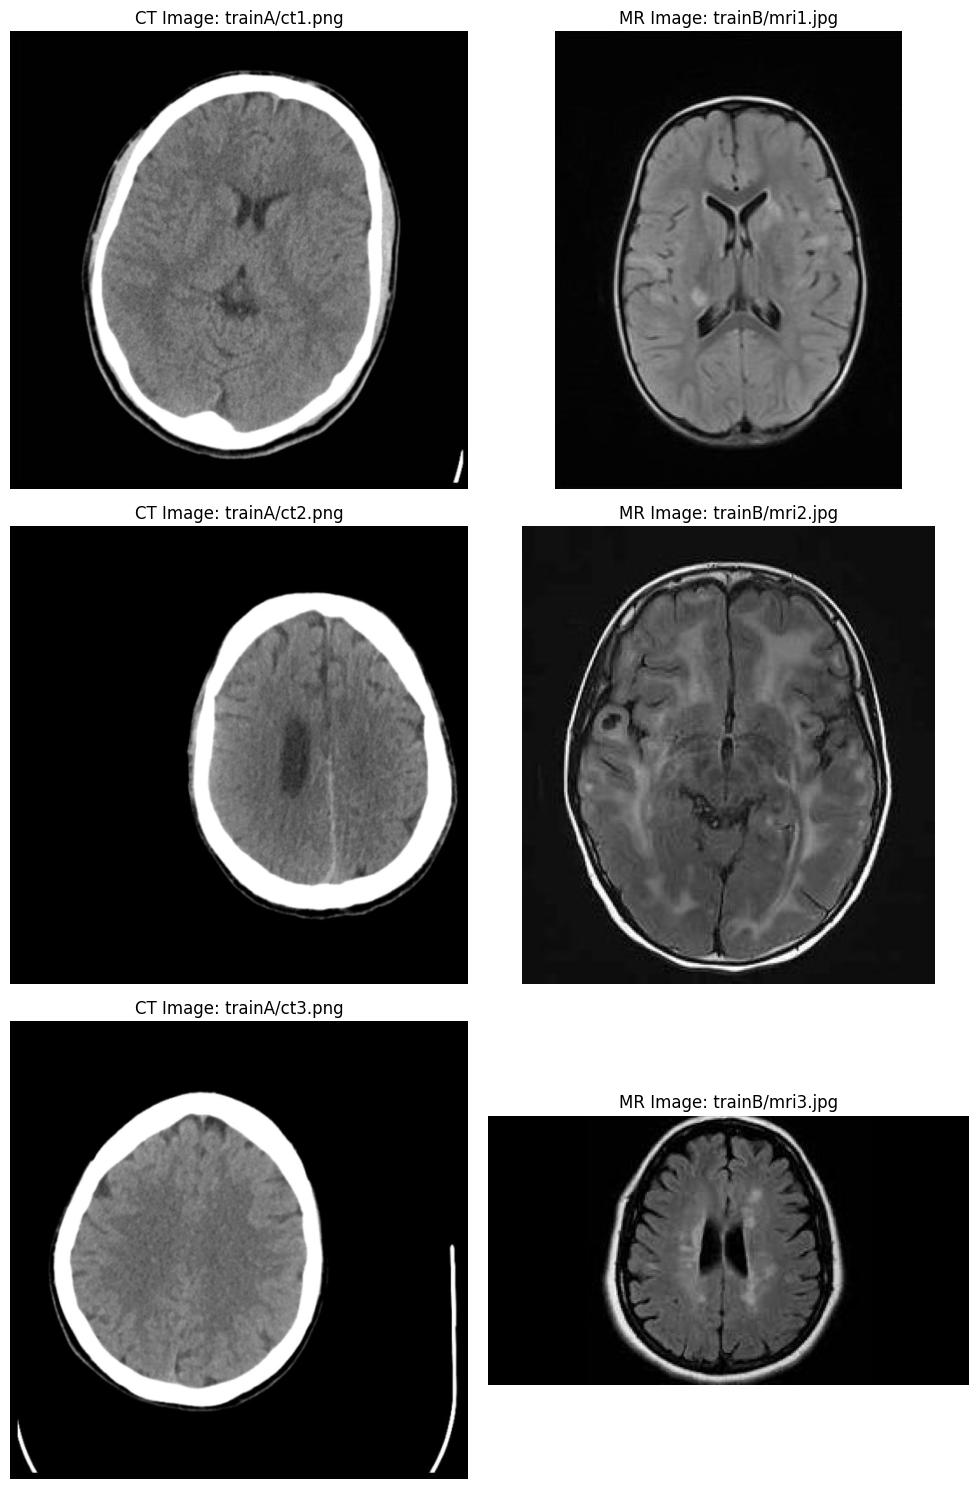

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import re

# Define paths to the folders
base_path = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images"
trainA_path = os.path.join(base_path, "trainA")
trainB_path = os.path.join(base_path, "trainB")

# Function to get sorted list of files in a directory
def get_sorted_files(directory):
    return sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Function to extract number from filename
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else None

# Get list of files in TrainA and TrainB
trainA_files = get_sorted_files(trainA_path)
trainB_files = get_sorted_files(trainB_path)

# Print out the files to debug
print("Files in TrainA:")
print(trainA_files)
print("Files in TrainB:")
print(trainB_files)

# Create a dictionary to map file numbers to filenames
trainA_dict = {extract_number(f): f for f in trainA_files}
trainB_dict = {extract_number(f): f for f in trainB_files}

# Find common numbers in both TrainA and TrainB
common_numbers = set(trainA_dict.keys()).intersection(set(trainB_dict.keys()))

# Print out the common numbers to debug
print("Common numbers:")
print(common_numbers)

# Create a list to hold the mapping information
mapping = [(trainA_dict[num], trainB_dict[num]) for num in common_numbers]

# Convert the mapping to a DataFrame
mapping_df = pd.DataFrame(mapping, columns=['CT Image', 'MR Image'])

# Prepend the paths to the image filenames
mapping_df['CT Image'] = mapping_df['CT Image'].apply(lambda x: os.path.join("trainA", x))
mapping_df['MR Image'] = mapping_df['MR Image'].apply(lambda x: os.path.join("trainB", x))

# Save the DataFrame to a CSV file
mapping_csv_path = os.path.join(base_path, "ct_mr_mapping.csv")
mapping_df.to_csv(mapping_csv_path, index=False)

print(f"Mapping saved to {mapping_csv_path}")

# Function to display an image
def show_image(image_path, title):
    full_path = os.path.join(base_path, image_path)
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"Could not read image at {full_path}")

# Display the mapped images
num_pairs_to_display = 3  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i in range(num_pairs_to_display):
    if i >= len(mapping_df):
        break
    ct_image_path = mapping_df.iloc[i]['CT Image']
    mr_image_path = mapping_df.iloc[i]['MR Image']

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_image(ct_image_path, f"CT Image: {mapping_df.iloc[i]['CT Image']}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_image(mr_image_path, f"MR Image: {mapping_df.iloc[i]['MR Image']}")

plt.tight_layout()
plt.show()


Stanford data -> first map , df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.1 MB/s eta 0:00:00
Files in /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/MR/image_MR: ['10_MR_s1.dcm', '10_MR_s2.dcm', '10_MR_s2_augmented.dcm', '10_MR_s3.dcm', '10_MR_s3_augmented.dcm']
Files in /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/CT/image_CT: ['10_CT_s1.dcm', '10_CT_s2.dcm', '10_CT_s2_augmented.dcm', '10_CT_s3.dcm', '10_CT_s3_augmented.dcm']
MR Dictionary: [(('10', '1'), '10_MR_s1.dcm'), (('10', '2'), '10_MR_s2.dcm'), (('10', '3'), '10_MR_s3.dcm'), (('10', '4'), '10_MR_s4.dcm'), (('10', '5'), '10_MR_s5.dcm')]
CT Dictionary: [(('10', '1'), '10_CT_s1.dcm'), (('10', '2'), '10_CT_s2.dcm'), (('10', '3'), '10_CT_s3.dcm'), (('10', '4'), '10_CT_s4.dcm'), (('10', '5'), '10_CT_s5.dcm')]
Common keys found: [('19', '3'), ('17', '2'), ('12', '2'), ('8', '5'), ('19', '2')]
Mapping saved to /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR

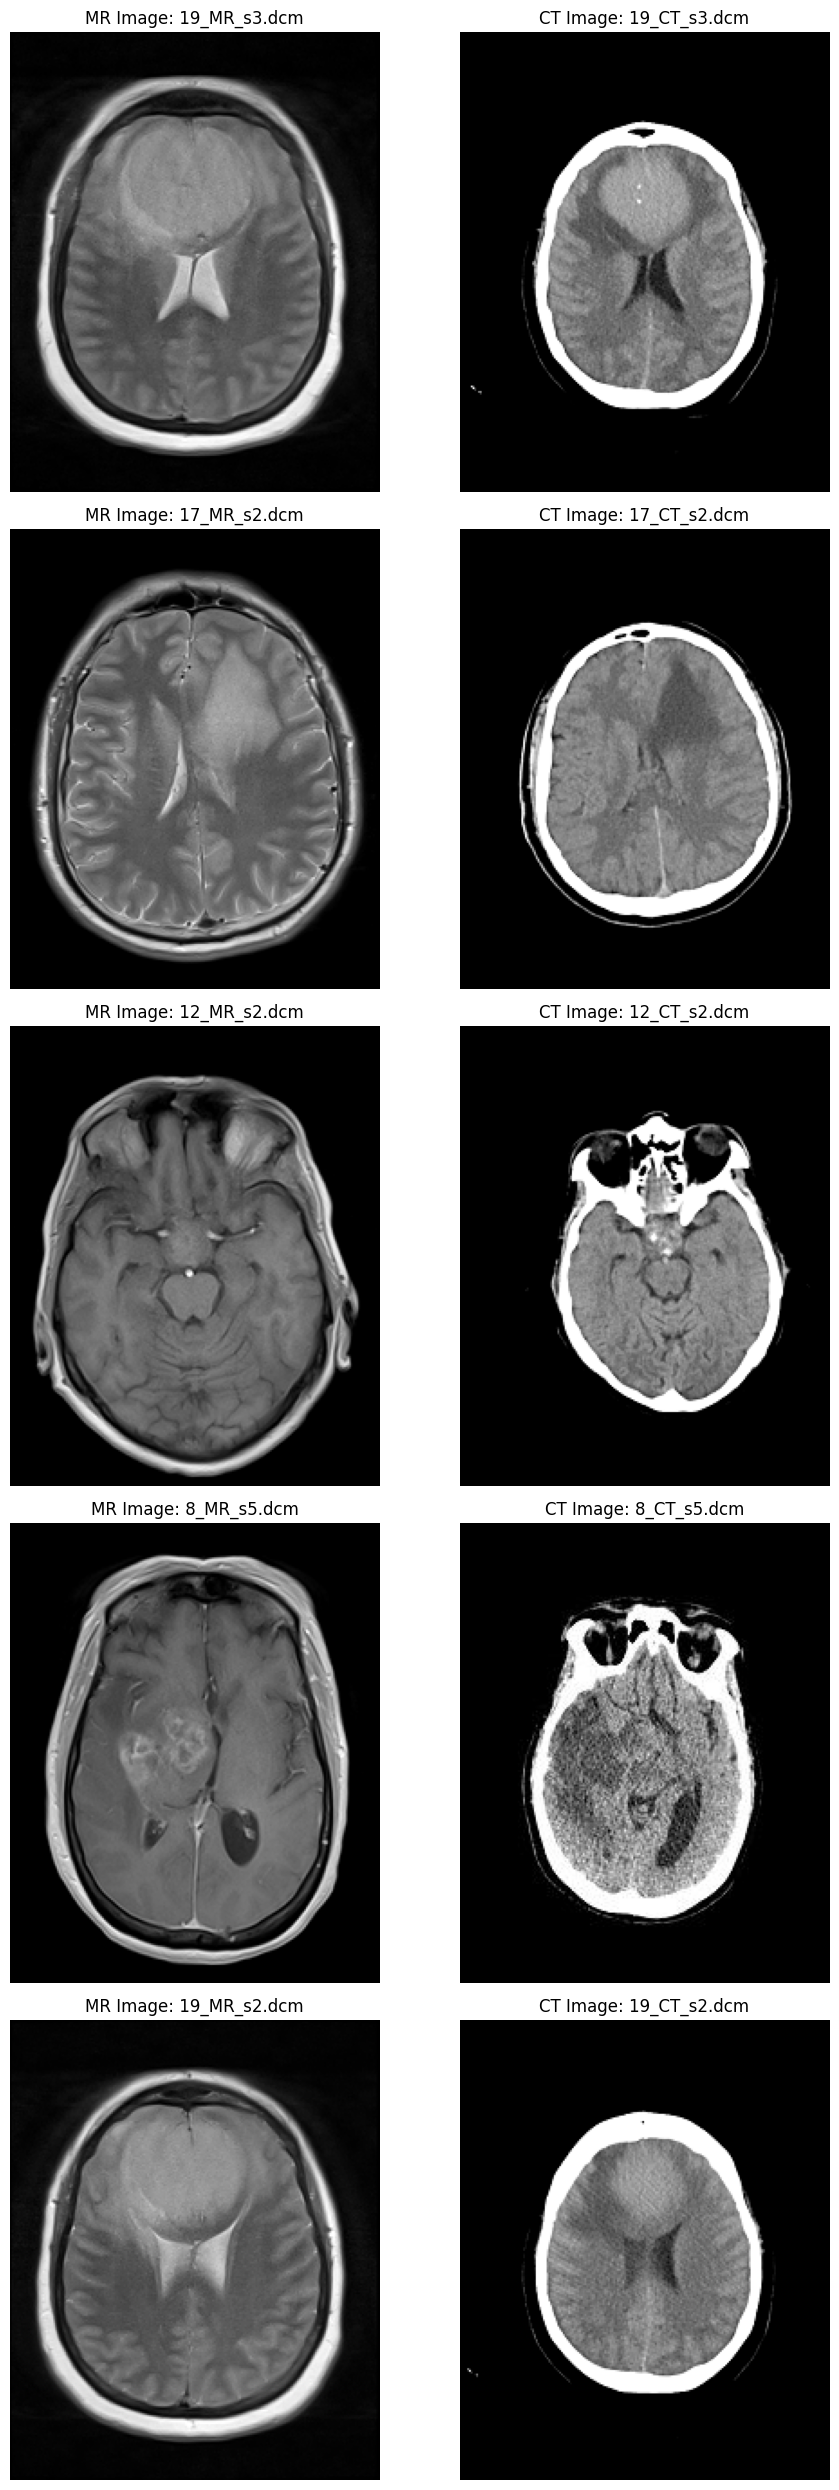

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
!pip install pydicom
import pydicom
import re

# Define the base path to your dataset
base_path = '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset'

# Define paths to the MR and CT image directories
mr_image_path = os.path.join(base_path, 'MR/image_MR')
ct_image_path = os.path.join(base_path, 'CT/image_CT')

# Function to get sorted list of files in a directory
def get_sorted_files(directory):
    files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    print(f"Files in {directory}: {files[:5]}")  # Print first 5 files to check
    return files

# Function to extract identifier and serial from filename
def extract_identifier_and_serial(filename, modality):
    match = re.match(r'(\d+)_{}_s(\d+).dcm'.format(modality), filename)
    return (match.group(1), match.group(2)) if match else None

# Get list of MR and CT files
mr_files = get_sorted_files(mr_image_path)
ct_files = get_sorted_files(ct_image_path)

# Create dictionaries to map (identifier, serial) to filenames
mr_dict = {extract_identifier_and_serial(f, 'MR'): f for f in mr_files if extract_identifier_and_serial(f, 'MR')}
ct_dict = {extract_identifier_and_serial(f, 'CT'): f for f in ct_files if extract_identifier_and_serial(f, 'CT')}

# Debug: Print the dictionaries to ensure correct extraction
print(f"MR Dictionary: {list(mr_dict.items())[:5]}")
print(f"CT Dictionary: {list(ct_dict.items())[:5]}")

# Find common identifiers and serials in both MR and CT
common_keys = set(mr_dict.keys()).intersection(set(ct_dict.keys()))
print(f"Common keys found: {list(common_keys)[:5]}")  # Print first 5 common keys

# Create a list to hold the mapping information
mapping = [(mr_dict[key], ct_dict[key]) for key in common_keys]

# Convert the mappings to a DataFrame
mapping_df = pd.DataFrame(mapping, columns=['MR Image', 'CT Image'])

# Save the DataFrame to a CSV file
output_csv_path = os.path.join(base_path, 'mr_ct_mapping.csv')
mapping_df.to_csv(output_csv_path, index=False)
print(f"Mapping saved to {output_csv_path}")

# Function to display a DICOM image
def show_dicom_image(image_path, title):
    try:
        ds = pydicom.dcmread(image_path)
        if ds.PixelData:
            image = ds.pixel_array
            plt.imshow(image, cmap='gray')
            plt.title(title)
            plt.axis('off')
    except Exception as e:
        print(f"Could not read {image_path}: {e}")

# Display the mapped images for a sample of the dataset
num_pairs_to_display = min(5, len(mapping))  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i, (mr_file, ct_file) in enumerate(mapping[:num_pairs_to_display]):
    mr_image_full_path = os.path.join(mr_image_path, mr_file)
    ct_image_full_path = os.path.join(ct_image_path, ct_file)

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_dicom_image(mr_image_full_path, f"MR Image: {os.path.basename(mr_image_full_path)}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_dicom_image(ct_image_full_path, f"CT Image: {os.path.basename(ct_image_full_path)}")

plt.tight_layout()
plt.show()

4 gb train -> 30% data , df


Train input shape: (570, 256, 256)
Train output shape: (570, 256, 256)
Test input shape: (150, 256, 256)
Test output shape: (150, 256, 256)
Validation input shape: (90, 256, 256)
Validation output shape: (90, 256, 256)


CT Image              MR Image
0      CT/ct_image_0.png    MR/mri_image_0.png
1      CT/ct_image_1.png    MR/mri_image_1.png
2      CT/ct_image_2.png    MR/mri_image_2.png
3      CT/ct_image_3.png    MR/mri_image_3.png
4      CT/ct_image_4.png    MR/mri_image_4.png
..                   ...                   ...
238  CT/ct_image_238.png  MR/mri_image_238.png
239  CT/ct_image_239.png  MR/mri_image_239.png
240  CT/ct_image_240.png  MR/mri_image_240.png
241  CT/ct_image_241.png  MR/mri_image_241.png
242  CT/ct_image_242.png  MR/mri_image_242.png

[243 rows x 2 columns]

Data saved to /content/processed_dicom_data.csv


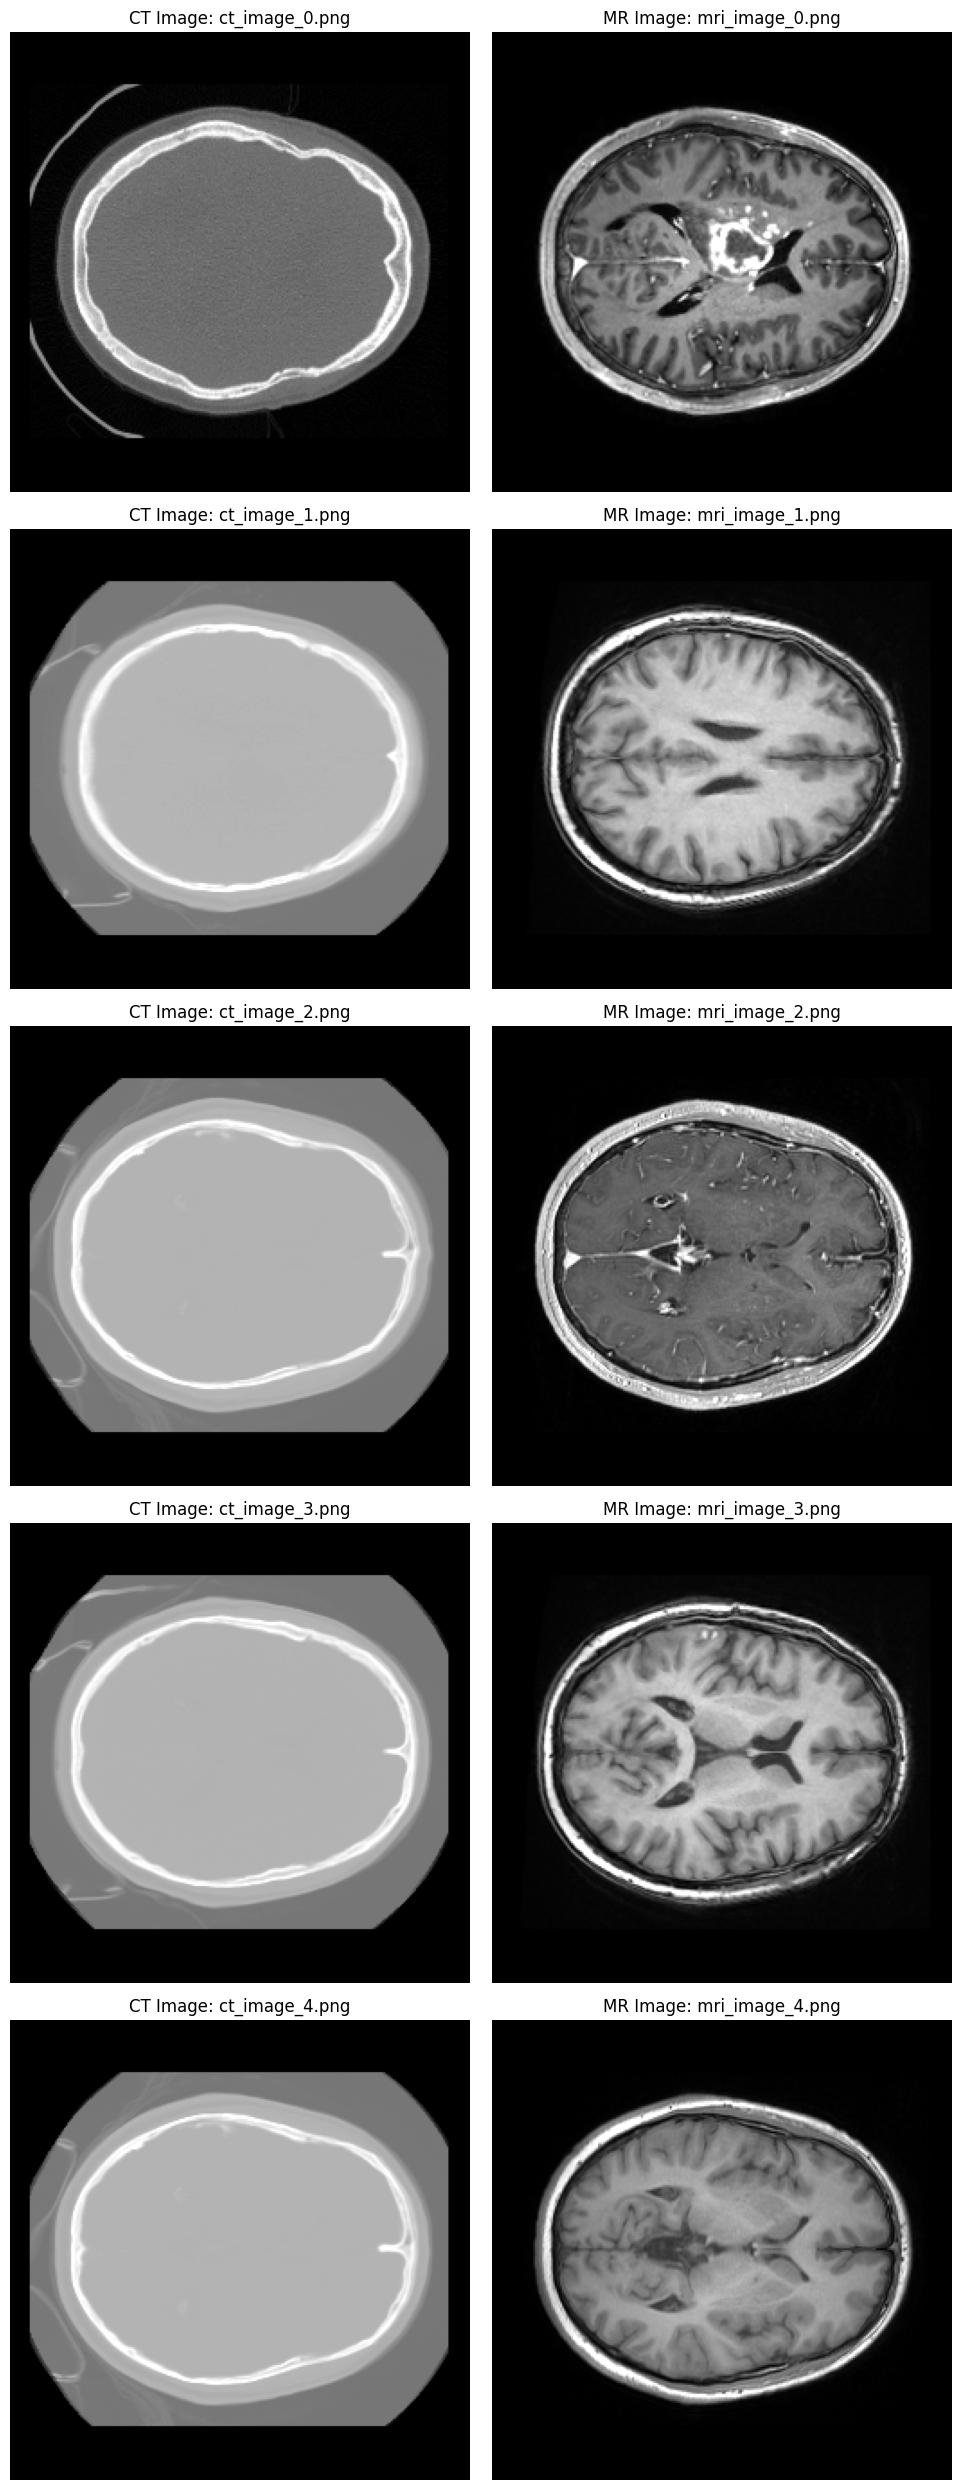

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

# Define paths to your dataset
path_to_train_input = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/train_input.npy'
path_to_train_output = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/train_output.npy'
path_to_test_input = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/test_input.npy'
path_to_test_output = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/test_output.npy'
path_to_val_input = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/val_input.npy'
path_to_val_output = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/val_output.npy'

# Load the data from .npy files
train_input = np.load(path_to_train_input)
train_output = np.load(path_to_train_output)
test_input = np.load(path_to_test_input)
test_output = np.load(path_to_test_output)
val_input = np.load(path_to_val_input)
val_output = np.load(path_to_val_output)

# Print shapes to confirm data is loaded correctly
print("Train input shape:", train_input.shape)
print("Train output shape:", train_output.shape)
print("Test input shape:", test_input.shape)
print("Test output shape:", test_output.shape)
print("Validation input shape:", val_input.shape)
print("Validation output shape:", val_output.shape)

# Combine the datasets for sampling
combined_input = np.concatenate((train_input, test_input, val_input))
combined_output = np.concatenate((train_output, test_output, val_output))

# Determine the number of samples to select (30% of the total data)
num_samples = int(0.3 * len(combined_input))

# Randomly select indices for sampling
selected_indices = random.sample(range(len(combined_input)), num_samples)

# Create directories to save the images
os.makedirs('/content/temp/CT', exist_ok=True)
os.makedirs('/content/temp/MR', exist_ok=True)

# Save the sampled MRI and CT images as files and create a DataFrame
sampled_mri_images = []
sampled_ct_images = []

for i, index in enumerate(selected_indices):
    mri_image = combined_input[index]
    ct_image = combined_output[index]

    mri_image_path = f"/content/temp/MR/mri_image_{i}.png"
    ct_image_path = f"/content/temp/CT/ct_image_{i}.png"

    cv2.imwrite(mri_image_path, (mri_image * 255).astype(np.uint8))  # Scale the image to 0-255 and convert to uint8
    cv2.imwrite(ct_image_path, (ct_image * 255).astype(np.uint8))    # Scale the image to 0-255 and convert to uint8

    sampled_mri_images.append(f"MR/mri_image_{i}.png")
    sampled_ct_images.append(f"CT/ct_image_{i}.png")

# Create DataFrame for the sampled dataset
df3 = pd.DataFrame({
    'CT Image': sampled_ct_images,
    'MR Image': sampled_mri_images
})

# Display the DataFrame using pandas' built-in functionality
from IPython.display import display
display(df3)

# Save the DataFrame to a CSV file if needed
output_csv_path = '/content/processed_dicom_data.csv'
df3.to_csv(output_csv_path, index=False)
print(f"Data saved to {output_csv_path}")

# Function to display an image using OpenCV
def show_image(image_path, title):
    full_path = f"/content/temp/{image_path}"
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"Could not read image at {full_path}")

# Display some sample pairs of images
num_pairs_to_display = 5  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i in range(num_pairs_to_display):
    if i >= len(df3):
        break
    ct_image_path = df3.iloc[i]['CT Image']
    mr_image_path = df3.iloc[i]['MR Image']

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_image(ct_image_path, f"CT Image: {os.path.basename(ct_image_path)}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_image(mr_image_path, f"MR Image: {os.path.basename(mr_image_path)}")

plt.tight_layout()
plt.show()


Combined_ Data = 1+2+3


Combined DataFrame saved to /content/combined_ct_mr_mapping.csv


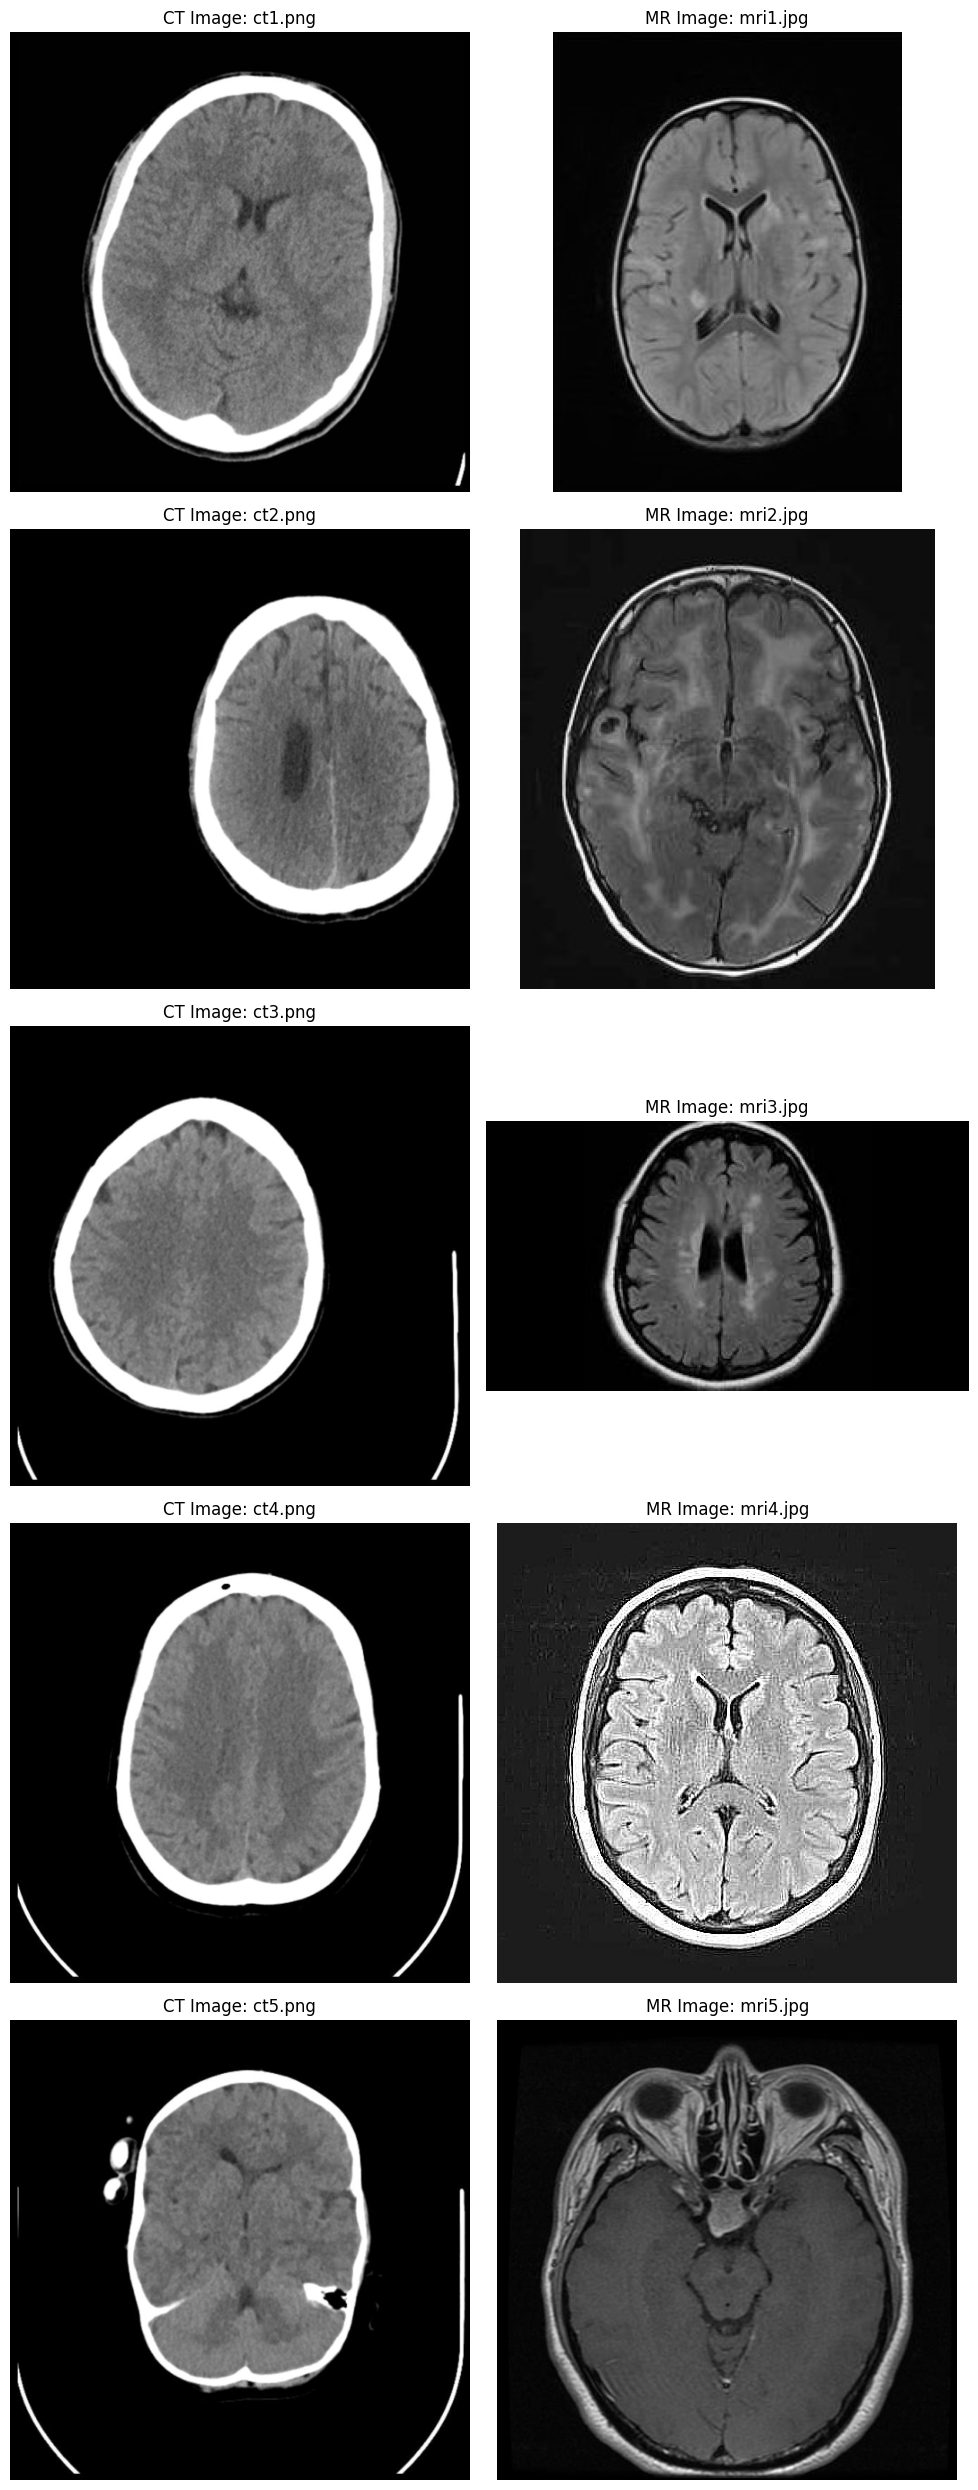

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import re

# Paths to the base directories
base_path1 = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images"
base_path2 = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset"
base_path3 = "/content/temp"

# Function to prepend base paths to the file names in the dataframes
def prepend_base_path(df, base_path, ct_col='CT Image', mr_col='MR Image'):
    df[ct_col] = df[ct_col].apply(lambda x: os.path.join(base_path, x))
    df[mr_col] = df[mr_col].apply(lambda x: os.path.join(base_path, x))
    return df

# Load the three DataFrames
df1_path = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/ct_mr_mapping.csv"
df2_path = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/mr_ct_mapping.csv"
df3_path = "/content/processed_dicom_data.csv"

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
df3 = pd.read_csv(df3_path)

# Ensure the paths in each dataframe are consistent
df1 = prepend_base_path(df1, base_path1)
df2.columns = ['MR Image', 'CT Image']
df2 = prepend_base_path(df2[['CT Image', 'MR Image']], base_path2)
df3 = prepend_base_path(df3, base_path3)

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_csv_path = "/content/combined_ct_mr_mapping.csv"
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined DataFrame saved to {combined_csv_path}")

# Function to display an image using OpenCV
def show_image(image_path, title):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"Could not read image at {image_path}")

# Display some sample pairs of images
num_pairs_to_display = 5  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i in range(num_pairs_to_display):
    if i >= len(combined_df):
        break
    ct_image_path = combined_df.iloc[i]['CT Image']
    mr_image_path = combined_df.iloc[i]['MR Image']

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_image(ct_image_path, f"CT Image: {os.path.basename(ct_image_path)}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_image(mr_image_path, f"MR Image: {os.path.basename(mr_image_path)}")

plt.tight_layout()
plt.show()


Combined_ Data -> augmentation -> final_Data

*(Applying shear , roations to the original Data , luminating, darkening with filters) -> 30%


In [6]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# import pydicom
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the base path to your dataset
# base_path = '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset'

# # Define paths to the MR and CT image directories
# mr_image_path = os.path.join(base_path, 'MR/image_MR')
# ct_image_path = os.path.join(base_path, 'CT/image_CT')

# # Function to get sorted list of files in a directory
# def get_sorted_files(directory):
#     files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
#     print(f"Files in {directory}: {files[:5]}")  # Print first 5 files to check
#     return files

# # Function to extract identifier and serial from filename
# def extract_identifier_and_serial(filename, modality):
#     match = re.match(r'(\d+)_{}_s(\d+).dcm'.format(modality), filename)
#     return (match.group(1), match.group(2)) if match else None

# # Get list of MR and CT files
# mr_files = get_sorted_files(mr_image_path)
# ct_files = get_sorted_files(ct_image_path)

# # Create dictionaries to map (identifier, serial) to filenames
# mr_dict = {extract_identifier_and_serial(f, 'MR'): f for f in mr_files if extract_identifier_and_serial(f, 'MR')}
# ct_dict = {extract_identifier_and_serial(f, 'CT'): f for f in ct_files if extract_identifier_and_serial(f, 'CT')}

# # Debug: Print the dictionaries to ensure correct extraction
# print(f"MR Dictionary: {list(mr_dict.items())[:5]}")
# print(f"CT Dictionary: {list(ct_dict.items())[:5]}")

# # Find common identifiers and serials in both MR and CT
# common_keys = set(mr_dict.keys()).intersection(set(ct_dict.keys()))
# print(f"Common keys found: {list(common_keys)[:5]}")  # Print first 5 common keys

# # Create a list to hold the mapping information
# mapping = [(mr_dict[key], ct_dict[key]) for key in common_keys]

# # Convert the mappings to a DataFrame
# mapping_df = pd.DataFrame(mapping, columns=['MR Image', 'CT Image'])

# # Save the DataFrame to a CSV file
# output_csv_path = os.path.join(base_path, 'mr_ct_mapping.csv')
# mapping_df.to_csv(output_csv_path, index=False)
# print(f"Mapping saved to {output_csv_path}")

# # Create directories for temporary storage of PNG files
# temp_mr_dir = '/content/temp/MR'
# temp_ct_dir = '/content/temp/CT'
# if not os.path.exists(temp_mr_dir):
#     os.makedirs(temp_mr_dir)
# if not os.path.exists(temp_ct_dir):
#     os.makedirs(temp_ct_dir)

# # Convert DICOM to PNG and save
# def dicom_to_png(dicom_path, output_path):
#     try:
#         ds = pydicom.dcmread(dicom_path)
#         if ds.PixelData:
#             image = ds.pixel_array
#             cv2.imwrite(output_path, image)
#     except Exception as e:
#         print(f"Could not read {dicom_path}: {e}")

# for _, row in mapping_df.iterrows():
#     mr_dicom_path = os.path.join(mr_image_path, row['MR Image'])
#     ct_dicom_path = os.path.join(ct_image_path, row['CT Image'])
#     mr_png_path = os.path.join(temp_mr_dir, row['MR Image'].replace('.dcm', '.png'))
#     ct_png_path = os.path.join(temp_ct_dir, row['CT Image'].replace('.dcm', '.png'))

#     dicom_to_png(mr_dicom_path, mr_png_path)
#     dicom_to_png(ct_dicom_path, ct_png_path)

# # Update DataFrame paths
# mapping_df['MR Image'] = mapping_df['MR Image'].apply(lambda x: os.path.join(temp_mr_dir, x.replace('.dcm', '.png')))
# mapping_df['CT Image'] = mapping_df['CT Image'].apply(lambda x: os.path.join(temp_ct_dir, x.replace('.dcm', '.png')))

# # Save the updated DataFrame
# temp_csv_path = '/content/temp/converted_mapping.csv'
# mapping_df.to_csv(temp_csv_path, index=False)
# print(f"Temporary converted DataFrame saved to {temp_csv_path}")

# # Now perform the augmentation on the converted images
# aug_gen = ImageDataGenerator(
#     rotation_range=40,
#     shear_range=0.2,
#     brightness_range=[0.5, 1.5],
#     fill_mode='nearest'
# )

# # Function to augment and save images
# def augment_and_save(image_path, save_dir, image_name, aug_gen):
#     image = cv2.imread(image_path)
#     if image is None:
#         print(f"Could not read image at {image_path}")
#         return None
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = np.expand_dims(image, 0)  # Expand dimensions to fit the model's expected input

#     # Generate augmented images
#     aug_iter = aug_gen.flow(image, batch_size=1)
#     aug_image = next(aug_iter)[0].astype(np.uint8)  # Take one batch and remove batch dimension

#     save_path = os.path.join(save_dir, image_name)
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
#     cv2.imwrite(save_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
#     return save_path

# # Create directories for augmented images
# aug_ct_dir = '/content/augmented/CT'
# aug_mr_dir = '/content/augmented/MR'
# if not os.path.exists(aug_ct_dir):
#     os.makedirs(aug_ct_dir)
# if not os.path.exists(aug_mr_dir):
#     os.makedirs(aug_mr_dir)

# # Augment and save images
# augmented_data = []
# sample_df = mapping_df.sample(frac=0.3, random_state=42).reset_index(drop=True)
# for i, row in sample_df.iterrows():
#     ct_image_path = row['CT Image']
#     mr_image_path = row['MR Image']

#     ct_image_name = f"aug_ct_image_{i}.png"
#     mr_image_name = f"aug_mr_image_{i}.png"

#     aug_ct_image_path = augment_and_save(ct_image_path, aug_ct_dir, ct_image_name, aug_gen)
#     aug_mr_image_path = augment_and_save(mr_image_path, aug_mr_dir, mr_image_name, aug_gen)

#     if aug_ct_image_path and aug_mr_image_path:
#         augmented_data.append({
#             'CT Image': aug_ct_image_path,
#             'MR Image': aug_mr_image_path
#         })

# # Save the augmented data to a new CSV file
# augmented_df = pd.DataFrame(augmented_data)
# augmented_csv_path = '/content/augmented_ct_mr_mapping.csv'
# augmented_df.to_csv(augmented_csv_path, index=False)
# print(f"Augmented DataFrame saved to {augmented_csv_path}")


In [7]:
import os
import pandas as pd
import numpy as np
import random
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the combined data
combined_csv_path = "/content/combined_ct_mr_mapping.csv"
combined_df = pd.read_csv(combined_csv_path)

# # Make sure the paths are absolute
# def make_absolute_path(df, base_dir, col_name):
#     df[col_name] = df[col_name].apply(lambda x: os.path.join(base_dir, x))
#     return df

# base_dir1 = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images"
# base_dir2 = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset"

# # Apply to both columns
# combined_df = make_absolute_path(combined_df, base_dir1, 'CT Image')
# combined_df = make_absolute_path(combined_df, base_dir2, 'MR Image')

# # Ensure paths are correct
# print(combined_df.head())

In [8]:
# Take 30% of the data
_, df_30_percent = train_test_split(combined_df, test_size=0.3, random_state=42)


In [9]:
# import os
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import pydicom
# from PIL import Image
# import numpy as np

# # Assuming combined_df is your original DataFrame
# _, df_30_percent = train_test_split(combined_df, test_size=0.3, random_state=42)

# # Define the base path to your dataset
# base_path = '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset'

# # Function to adjust the paths
# def adjust_path(path):
#     if 'MINI-standford' in path:
#         filename = os.path.basename(path)
#         if 'CT' in filename:
#             new_path = os.path.join(base_path, 'CT/image_CT', filename)
#         elif 'MR' in filename:
#             new_path = os.path.join(base_path, 'MR/image_MR', filename)
#         return new_path
#     return path

# # Apply the function to adjust paths in the DataFrame
# df_30_percent['CT Image'] = df_30_percent['CT Image'].apply(adjust_path)
# df_30_percent['MR Image'] = df_30_percent['MR Image'].apply(adjust_path)

# # Save the adjusted DataFrame to a CSV file
# output_csv_path = os.path.join(base_path, 'adjusted_mr_ct_mapping.csv')
# df_30_percent.to_csv(output_csv_path, index=False)
# print(f"Adjusted mapping saved to {output_csv_path}")

# # Display the adjusted paths for verification
# print(df_30_percent.head())

# # Function to open and display DICOM images in pairs
# def display_image_pairs(df):
#     num_pairs_to_display = min(5, len(df))  # Adjust the number of pairs to display as needed
#     plt.figure(figsize=(10, num_pairs_to_display * 5))

#     for i in range(num_pairs_to_display):
#         ct_image_path = df.iloc[i]['CT Image']
#         mr_image_path = df.iloc[i]['MR Image']

#         try:
#             # Load and display the CT image
#             ds_ct = pydicom.dcmread(ct_image_path, force=True)
#             ct_image = ds_ct.pixel_array
#             plt.subplot(num_pairs_to_display, 2, 2*i + 1)
#             plt.imshow(ct_image, cmap='gray')
#             plt.title(f'CT Image: {os.path.basename(ct_image_path)}')
#             plt.axis('off')

#             # Load and display the MR image
#             ds_mr = pydicom.dcmread(mr_image_path, force=True)
#             mr_image = ds_mr.pixel_array
#             plt.subplot(num_pairs_to_display, 2, 2*i + 2)
#             plt.imshow(mr_image, cmap='gray')
#             plt.title(f'MR Image: {os.path.basename(mr_image_path)}')
#             plt.axis('off')
#         except Exception as e:
#             print(f"Could not read images at index {i}: {e}")

#     plt.tight_layout()
#     plt.show()

# # Assuming df_30_percent is your DataFrame containing the image paths
# display_image_pairs(df_30_percent)


#Augmentation

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Function to open and display images in pairs
def display_image_pairs(df):
    num_pairs_to_display = min(5, len(df))  # Adjust the number of pairs to display as needed
    plt.figure(figsize=(10, num_pairs_to_display * 5))

    for i in range(num_pairs_to_display):
        ct_image_path = df.iloc[i]['CT Image']
        mr_image_path = df.iloc[i]['MR Image']

        try:
            ct_image = Image.open(ct_image_path)
            mr_image = Image.open(mr_image_path)

            plt.subplot(num_pairs_to_display, 2, 2*i + 1)
            plt.imshow(ct_image)
            plt.title(f'CT Image: {os.path.basename(ct_image_path)}')
            plt.axis('off')

            plt.subplot(num_pairs_to_display, 2, 2*i + 2)
            plt.imshow(mr_image)
            plt.title(f'MR Image: {os.path.basename(mr_image_path)}')
            plt.axis('off')
        except Exception as e:
            print(f"Could not read images at index {i}: {e}")

    plt.tight_layout()
    plt.show()

# Assuming df_30_percent is your DataFrame containing the image paths
display_image_pairs(df_30_percent)


Output hidden; open in https://colab.research.google.com to view.

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pydicom
import imgaug.augmenters as iaa

# Function to load an image (supports both PNG/JPG and DICOM)
def load_image(path):
    try:
        if path.lower().endswith('.dcm'):
            ds = pydicom.dcmread(path, force=True)
            image = ds.pixel_array
            image = (np.maximum(image, 0) / image.max()) * 255.0  # Normalize the image to 0-255
            image = image.astype(np.uint8)
        else:
            image = Image.open(path)
            image = np.array(image)
        return image
    except Exception as e:
        print(f"Could not read image at {path}: {e}")
        return None

# Define the augmentation pipeline
augmentation_pipeline = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),  # Rotate images
    iaa.Affine(shear=(-16, 16)),   # Shear images
    iaa.Affine(scale=(0.8, 1.2))   # Scale images
])

# Function to apply augmentation and save results
def augment_and_save_images(df, save_dir):
    augmented_data = []

    for i in range(len(df)):
        ct_image_path = df.iloc[i]['CT Image']
        mr_image_path = df.iloc[i]['MR Image']

        ct_image = load_image(ct_image_path)
        mr_image = load_image(mr_image_path)

        if ct_image is None or mr_image is None:
            continue

        # Apply augmentations
        ct_aug = augmentation_pipeline(images=[ct_image])[0]
        mr_aug = augmentation_pipeline(images=[mr_image])[0]

        # Save augmented images
        ct_aug_path = os.path.join(save_dir, f'aug_ct_{i}.png')
        mr_aug_path = os.path.join(save_dir, f'aug_mr_{i}.png')

        Image.fromarray(ct_aug).save(ct_aug_path)
        Image.fromarray(mr_aug).save(mr_aug_path)

        augmented_data.append([ct_aug_path, mr_aug_path])

    # Create a new DataFrame with the augmented images
    augmented_df = pd.DataFrame(augmented_data, columns=['CT Image', 'MR Image'])
    return augmented_df

# Assuming df_30_percent is your DataFrame containing the image paths

# Create a directory to save augmented images
augmented_images_dir = '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

# Apply augmentations and save the new DataFrame
augmented_df = augment_and_save_images(df_30_percent, augmented_images_dir)

# Save the augmented DataFrame to a CSV file
augmented_csv_path = os.path.join(augmented_images_dir, 'augmented_mr_ct_mapping.csv')
augmented_df.to_csv(augmented_csv_path, index=False)
print(f"Augmented mapping saved to {augmented_csv_path}")

# Display the augmented paths for verification
print(augmented_df.head())

Could not read image at /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/9_CT_s2.dcm: [Errno 2] No such file or directory: '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/9_CT_s2.dcm'
Could not read image at /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/9_MR_s2.dcm: [Errno 2] No such file or directory: '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/9_MR_s2.dcm'


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("/content/combined_ct_mr_mapping.csv")
# Combine the original DataFrame with the augmented DataFrame
final_df = pd.concat([df, augmented_df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
final_csv_path = '/content/drive/MyDrive/combined_and_augmented_ct_mr_mapping.csv'
final_df.to_csv(final_csv_path, index=False)
print(f"Combined DataFrame saved to {final_csv_path}")

# Display the combined DataFrame for verification
print(final_df.head())

In [ ]:
# Function to load an image (supports both PNG/JPG and DICOM)
def load_image(path):
    try:
        if path.lower().endswith('.dcm'):
            ds = pydicom.dcmread(path, force=True)
            image = ds.pixel_array
            image = (np.maximum(image, 0) / image.max()) * 255.0  # Normalize the image to 0-255
            image = image.astype(np.uint8)
        else:
            image = Image.open(path)
            image = np.array(image)
        return image
    except Exception as e:
        print(f"Could not read image at {path}: {e}")
        return None

# Function to open and display images in pairs
def display_image_pairs(df):
    num_pairs_to_display = min(5, len(df))  # Adjust the number of pairs to display as needed
    plt.figure(figsize=(10, num_pairs_to_display * 5))

    for i in range(num_pairs_to_display):
        ct_image_path = df.iloc[i]['CT Image']
        mr_image_path = df.iloc[i]['MR Image']

        try:
            ct_image = load_image(ct_image_path)
            mr_image = load_image(mr_image_path)

            if ct_image is not None:
                plt.subplot(num_pairs_to_display, 2, 2*i + 1)
                plt.imshow(ct_image, cmap='gray')
                plt.title(f'CT Image: {os.path.basename(ct_image_path)}')
                plt.axis('off')

            if mr_image is not None:
                plt.subplot(num_pairs_to_display, 2, 2*i + 2)
                plt.imshow(mr_image, cmap='gray')
                plt.title(f'MR Image: {os.path.basename(mr_image_path)}')
                plt.axis('off')

        except Exception as e:
            print(f"Could not read images at index {i}: {e}")

    plt.tight_layout()
    plt.show()

# Display image pairs from the combined DataFrame
display_image_pairs(final_df)

##Model Selection

##Objective:
The primary objective of this task was to process, augment, and visualize MRI and CT scan images from a given dataset. The steps involved included loading the data, augmenting 30% of the dataset, and finally visualizing both the original and augmented images.

##Data Loading:

Initially, we loaded the dataset consisting of MRI and CT images. The dataset was divided into training, validation, and test sets. The MRI and CT images were stored in separate folders, with corresponding images paired based on a naming convention.

## Data Preprocessing and Augmentation:
* **Loading Data**: We loaded the dataset paths into a DataFrame to manage and track the images efficiently.

* **Filtering Non-Compressed Images**: Many of the images in the dataset were compressed, which posed a challenge for augmentation and visualization. We filtered out the compressed images to focus on uncompressed data.

* **Selecting Data for Augmentation**: We selected 30% of the non-compressed images for augmentation to enhance the dataset's diversity.

* **Augmentation Techniques**: The selected images underwent various augmentation techniques, including:

    * **Shearing**: Altering the shape of the image by slanting it.
    * **Rotation**: Rotating the image by a random angle.
    * **Brightening**: Increasing the brightness of the image.
    * **Darkening**: Decreasing the brightness of the image.
    * **Saving Augmented Images**: The augmented images were saved as new DICOM files, ensuring they were properly stored and associated with their original counterparts.

## Visualization:
After augmenting the images, we proceeded to visualize both the original and augmented images to verify the augmentations and get an insight into the dataset.

  * **Loading Combined Data**: We loaded the combined dataset containing both original and augmented images.
  * **Filtering Non-Compressed Images for Visualization**: We filtered out any compressed images to ensure smooth visualization.
  * **Displaying Images**: We selected a few samples from the non-compressed dataset for visualization. Using matplotlib, we displayed the MRI and CT images side by side.

## Output and Description:
The visualization provided the following insights:

  1) **Original and Augmented MRI Images**: The MRI images showed the brain's structure, with the augmented versions demonstrating transformations such as shearing, rotation, and changes in brightness.

  2) **Original and Augmented CT Images**: The CT images, typically showing denser structures like bones, were similarly transformed. The augmentations were evident, helping to diversify the dataset and potentially improve the robustness of models trained on this data.


## Sample Visualizations:
Here are a few examples of the visualizations:

* **Sheared Image**: The shearing transformation slants the image, providing a different perspective.
Rotated Image: Rotation adds variability in orientation, helping models generalize better.
* **Brightened Image**: Increasing brightness helps simulate different lighting conditions.
* **Darkened Image**: Decreasing brightness similarly helps simulate varying conditions.


## Conclusion:

The process involved several critical steps to ensure that the data was properly augmented and visualized. By filtering out compressed images and applying various augmentation techniques, we enhanced the dataset's diversity, which is crucial for training robust machine learning models. The final visualizations confirmed that the augmentations were applied correctly, providing a diverse set of images for future use.

This process not only improved our dataset but also provided valuable insights into the effectiveness of different augmentation techniques on MRI and CT images.

##MODELS

**Models** -> Unet , Attention U-Net, CycleGAN

**Reasons for Choosing Models**

 * **U-Net**:

      * **Medical Imaging Expertise:** Designed for medical image tasks.
      * **Skip Connections:** Preserves spatial information.
      * **Proven Performance:** Effective in similar tasks.


  * **Attention U-Net:**

      * **Attention Mechanisms:** Focuses on important regions.
      * **Improved Accuracy:** Captures finer details.
      * **Adaptive Learning:** Dynamically adjusts focus.

  * **CycleGAN:**

      * **Unsupervised Learning:** Works without paired datasets.
      * **Bidirectional Mapping:** Ensures robust image generation.
      * **Cycle Consistency:** Maintains anatomical correctness.







##Model Building

In [ ]:
!pip install numpy pandas pydicom Pillow matplotlib tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv5))
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs, conv10)

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    return model


In [ ]:
import tensorflow as tf
import numpy as np

def preprocess_images(df, img_size=(256, 256)):
    X = []  # MRI Images
    Y = []  # CT Images

    for i in range(len(df)):
        mri_image_path = df.iloc[i]['MR Image']
        ct_image_path = df.iloc[i]['CT Image']

        # Load MRI and CT images
        mri_image = load_image(mri_image_path)
        ct_image = load_image(ct_image_path)

        if mri_image is not None and ct_image is not None:
            # Check if images are 2D and expand dimensions
            if len(mri_image.shape) == 2:  # Grayscale image (Height, Width)
                mri_image = np.expand_dims(mri_image, axis=-1)  # Convert to (Height, Width, 1)
            if len(ct_image.shape) == 2:  # Grayscale image (Height, Width)
                ct_image = np.expand_dims(ct_image, axis=-1)  # Convert to (Height, Width, 1)

            # Resize images if they are larger than the target size
            mri_image_resized = tf.image.resize(mri_image, img_size) if (mri_image.shape[0] > img_size[0] or mri_image.shape[1] > img_size[1]) else mri_image
            ct_image_resized = tf.image.resize(ct_image, img_size) if (ct_image.shape[0] > img_size[0] or ct_image.shape[1] > img_size[1]) else ct_image

            # Determine padding needed to reach the desired size
            mri_height, mri_width = mri_image_resized.shape[0], mri_image_resized.shape[1]
            ct_height, ct_width = ct_image_resized.shape[0], ct_image_resized.shape[1]

            # Compute padding sizes for MRI and CT images
            mri_pad_top = max(0, (img_size[0] - mri_height) // 2)
            mri_pad_bottom = max(0, img_size[0] - mri_height - mri_pad_top)
            mri_pad_left = max(0, (img_size[1] - mri_width) // 2)
            mri_pad_right = max(0, img_size[1] - mri_width - mri_pad_left)

            ct_pad_top = max(0, (img_size[0] - ct_height) // 2)
            ct_pad_bottom = max(0, img_size[0] - ct_height - ct_pad_top)
            ct_pad_left = max(0, (img_size[1] - ct_width) // 2)
            ct_pad_right = max(0, img_size[1] - ct_width - ct_pad_left)

            # Apply padding to images
            mri_image_padded = tf.image.pad_to_bounding_box(mri_image_resized, mri_pad_top, mri_pad_left, img_size[0], img_size[1])
            ct_image_padded = tf.image.pad_to_bounding_box(ct_image_resized, ct_pad_top, ct_pad_left, img_size[0], img_size[1])

            # Convert to numpy arrays
            mri_image_padded = mri_image_padded.numpy()
            ct_image_padded = ct_image_padded.numpy()

            # Normalize the images to [0, 1]
            mri_image_normalized = mri_image_padded / 255.0
            ct_image_normalized = ct_image_padded / 255.0

            # Append to the respective lists
            X.append(mri_image_normalized)
            Y.append(ct_image_normalized)

    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

# Preprocess the images
X, Y = preprocess_images(final_df)


In [ ]:
# Create the U-Net model
model = unet_model(input_size=(256, 256, 1))

# Train the model
history = model.fit(X, Y, batch_size=8, epochs=30, validation_split=0.2)

# Save the model
model.save('unet_mri_to_ct.h5')


In [ ]:
import matplotlib.pyplot as plt

def display_prediction(model, X, Y, num_images=5):
    predictions = model.predict(X[:num_images])

    plt.figure(figsize=(10, num_images * 3))
    for i in range(num_images):
        # Display original MRI
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        plt.title('Original MRI')
        plt.axis('off')

        # Display Ground Truth CT
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(Y[i].squeeze(), cmap='gray')
        plt.title('Ground Truth CT')
        plt.axis('off')

        # Display Predicted CT
        plt.subplot(num_images, 3, i * 3 + 3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title('Predicted CT')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the predictions
display_prediction(model, X, Y)
